<a href="https://colab.research.google.com/github/deanzedd/Machine-Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ví dụ trên python

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.spatial.distance import cdist
import random

np.random.seed(18) #gieo 1 seed thì khi khởi tạo lại rand thì dãy ban đầu ko đổi
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N=500

x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((x0, x1, x2), axis = 0) #
K = 3 #3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T


In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

*các hàm số cần thiết*


a. **kmeans_init_centroids** khởi tạo các tâm cụm.

b. **kmeans_asign_labels** tìm nhãn mới cho các điểm khi biết các tâm cụm.

c. **kmeans_update_centroids** cập nhật các tâm cụm khi biết nhãn của từng điểm

d.  **has_converged** kim tra điều kiện dừng của thuật toán

In [ ]:
def kmeans_init_centroids(X, k) :
  # randomly pick k rows of X as initial centroids
  return X[np.random.choice(X.shape[0], k, replace=False)]#np.random... để chọn ngẫu nhiên index của hàng

def kmeans_assign_labels(X, centroids) :
  #calculate pairwise distances btw data and centroids
  D = cdist(X, centroids) #return ma trận khoảng cách giữa 2 set
  # hàng đầu tiên sẽ là kc từ X[0] đến centroids
  #assign labels of each data(return index of the closest centroid)
  return np.argmin(D, axis = 1) #axis = 1 return min trong hàng
  #axis = 0 return min trong cột

def kmeans_update_centroids(X, labels, K) :
  centroids = np.zeros((K, X.shape[1]))
  for k in range (K) :
    #collect all points that are assigned to the k-th cluster
    Xk = X[labels ==k, :] #liệt kê hết các phần tử thuộc cụm k
    centroids[k,:] = np.mean(Xk, axis = 0) #take average
  return centroids

def has_converged(centroids, new_centroids) :
  # return True if two sets of centroids are the same
  return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))



*Phần chính của phân cụm K-means*

In [ ]:
def kmeans(X, K) :
  centroids = [kmeans_init_centroids(X,K)]
  labels = []
  it=0
  while True:
    labels.append(kmeans_assign_labels(X, centroids[-1]))
    #centroids[-1] truy cập vào phần tử cuối
    #append cập nhật phần tử cuối vào mảng
    new_centroids = kmeans_update_centroids(X, labels[-1], K)
    if has_converged(centroids[-1], new_centroids):
      break
    centroids.append(new_centroids)
    it+=1
  return (centroids, labels, it)


Centers found by our algorithm:
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


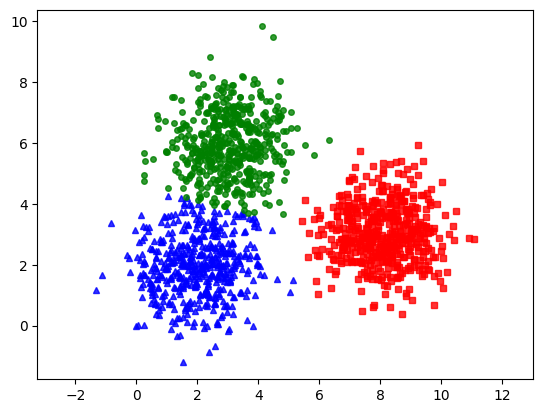

In [ ]:
centroids, labels, it=kmeans(X,K)
print('Centers found by our algorithm:')
print(centroids[-1])

kmeans_display(X, labels[-1])

*thử trên thư viện sklearn*

Centers found by sklearn
[[8.07476866 3.01494931]
 [3.02521978 5.94885115]
 [1.98112961 1.95794411]]


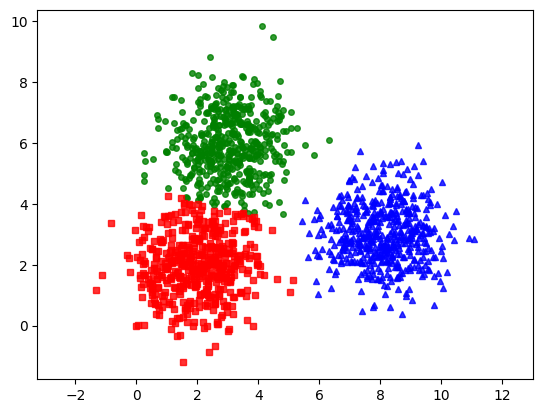

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0).fit(X)
print('Centers found by sklearn')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)